**Objective**

Your objective is to predict the future bike shares.

**Evaluation Criteria**
Submissions are evaluated using Root Mean Squared Log Error (RMSLE).

**About the Data**
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA.


bike_share_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bike_data/bike_train.csv" )

**Data Description**
- instant: record index

- dteday : date

- season : season (1:spring, 2:summer, 3:fall, 4:winter)

- yr : year (0: 2011, 1:2012)

- mnth : month ( 1 to 12)

- hr : hour (0 to 23)

- holiday : weather day is holiday or not

- weekday : day of the week

- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

+ weathersit : 

    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp : Normalized temperature in Celsius. The values are divided to 41 (max)

- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

- hum: Normalized humidity. The values are divided to 100 (max)

- windspeed: Normalized wind speed. The values are divided to 67 (max)

- cnt: count of total rental bikes including both casual and registered

In [ ]:
#importing libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

In [ ]:
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [ ]:
train=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bike_data/bike_train.csv')

In [ ]:
test=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bike_data/bike_test.csv')

In [ ]:
df=train.copy()
test_df=test.copy()
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,10136,03-03-2012,1,1,3,9,0,6,0,3,0.38,0.3939,0.87,0.0896,94
1,6987,23-10-2011,4,0,10,17,0,0,0,1,0.50,0.4848,0.63,0.1343,340
2,14303,24-08-2012,3,1,8,3,0,5,1,1,0.64,0.6061,0.73,0.0000,8
3,2295,10-04-2011,2,0,4,11,0,0,0,2,0.40,0.4091,0.87,0.1343,202
4,7869,29-11-2011,4,0,11,12,0,2,1,3,0.42,0.4242,0.82,0.4179,18


In [ ]:
df.columns.unique()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     13903 non-null  int64  
 1   dteday      13903 non-null  object 
 2   season      13903 non-null  int64  
 3   yr          13903 non-null  int64  
 4   mnth        13903 non-null  int64  
 5   hr          13903 non-null  int64  
 6   holiday     13903 non-null  int64  
 7   weekday     13903 non-null  int64  
 8   workingday  13903 non-null  int64  
 9   weathersit  13903 non-null  int64  
 10  temp        13903 non-null  float64
 11  atemp       13903 non-null  float64
 12  hum         13903 non-null  float64
 13  windspeed   13903 non-null  float64
 14  cnt         13903 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1.6+ MB


#EDA

In [ ]:
df.season.value_counts()

3    3573
2    3516
4    3433
1    3381
Name: season, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


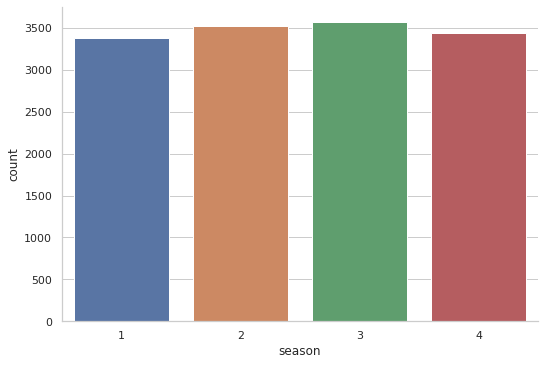

In [ ]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

In [ ]:
df.holiday.value_counts()

0    13491
1      412
Name: holiday, dtype: int64

In [ ]:
df.workingday.value_counts()

1    9462
0    4441
Name: workingday, dtype: int64

In [ ]:
df.weathersit.value_counts()

1    9140
2    3615
3    1145
4       3
Name: weathersit, dtype: int64

In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,8716.116809,2.507660,0.504855,6.546788,11.550313,0.029634,3.000360,0.680573,1.425376,0.496537,0.475354,0.626633,0.189935,189.526433
std,5028.742843,1.109166,0.499994,3.447943,6.909805,0.169581,2.009132,0.466272,0.640678,0.192830,0.172028,0.192620,0.122033,181.112169
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4370.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8732.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,143.000000
75%,13075.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,1.000000,1.000000,0.850700,976.000000


In [1]:
df.hist(figsize=(20,8));

NameError: ignored

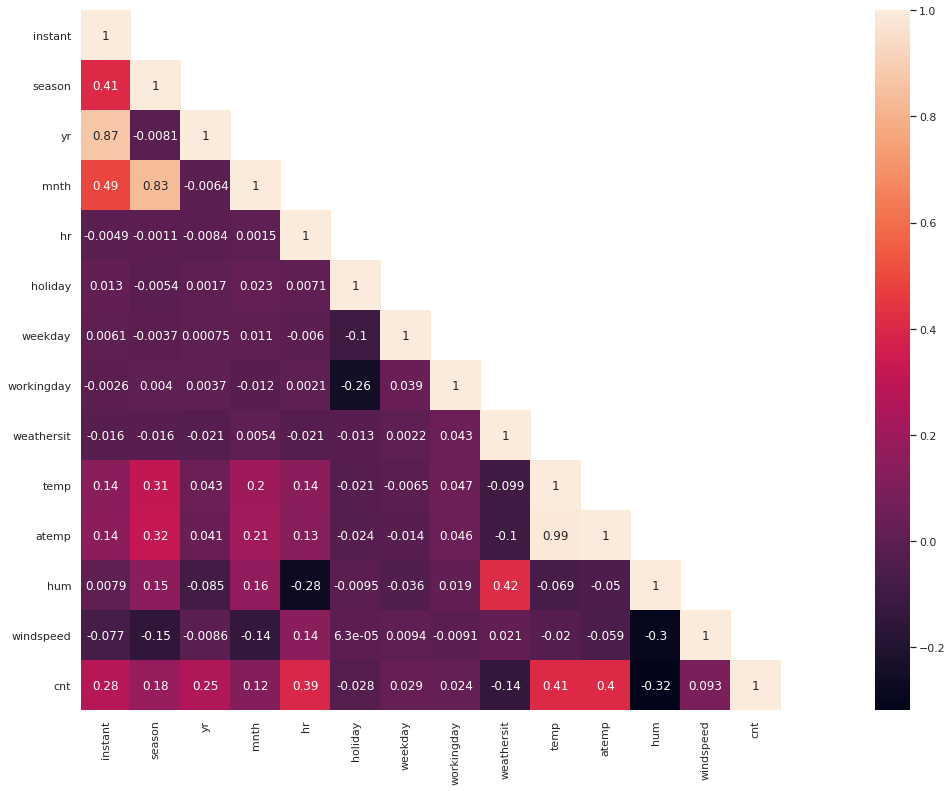

In [ ]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

(temp,atemp),(season,month),(year,count) have coorelation coefficients > 0.8

# Feature

convert each season into individual columns

In [ ]:
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4
0,16267,15-11-2012,4,1,11,12,0,4,1,2,0.36,0.3636,0.62,0.1045,0,0,0,1
1,11800,11-05-2012,2,1,5,20,0,5,1,1,0.62,0.6061,0.25,0.1343,0,1,0,0
2,284,13-01-2011,1,0,1,6,0,4,1,1,0.12,0.1515,0.54,0.1343,1,0,0,0
3,8876,10-01-2012,1,1,1,16,0,2,1,1,0.42,0.4242,0.38,0.3582,1,0,0,0
4,8506,26-12-2011,1,0,12,2,1,1,0,1,0.34,0.3182,0.46,0.2239,1,0,0,0


also covert each weather into individual columns

In [ ]:
weathersit=pd.get_dummies(df['weathersit'],prefix='weathersit')
df=pd.concat([df,weathersit],axis=1)
df.head()
weathersit=pd.get_dummies(test_df['weathersit'],prefix='weathersit')
test_df=pd.concat([test_df,weathersit],axis=1)
test_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,16267,15-11-2012,4,1,11,12,0,4,1,2,0.36,0.3636,0.62,0.1045,0,0,0,1,0,1,0
1,11800,11-05-2012,2,1,5,20,0,5,1,1,0.62,0.6061,0.25,0.1343,0,1,0,0,1,0,0
2,284,13-01-2011,1,0,1,6,0,4,1,1,0.12,0.1515,0.54,0.1343,1,0,0,0,1,0,0
3,8876,10-01-2012,1,1,1,16,0,2,1,1,0.42,0.4242,0.38,0.3582,1,0,0,0,1,0,0
4,8506,26-12-2011,1,0,12,2,1,1,0,1,0.34,0.3182,0.46,0.2239,1,0,0,0,1,0,0


dropping original season and weathersit columns

In [ ]:
df.drop(['season','weathersit'],inplace=True,axis=1)
df.head()
test_df.drop(['season','weathersit'],inplace=True,axis=1)
test_df.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,16267,15-11-2012,1,11,12,0,4,1,0.36,0.3636,0.62,0.1045,0,0,0,1,0,1,0
1,11800,11-05-2012,1,5,20,0,5,1,0.62,0.6061,0.25,0.1343,0,1,0,0,1,0,0
2,284,13-01-2011,0,1,6,0,4,1,0.12,0.1515,0.54,0.1343,1,0,0,0,1,0,0
3,8876,10-01-2012,1,1,16,0,2,1,0.42,0.4242,0.38,0.3582,1,0,0,0,1,0,0
4,8506,26-12-2011,0,12,2,1,1,0,0.34,0.3182,0.46,0.2239,1,0,0,0,1,0,0


Convert date into day, month and year

In [ ]:
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.dteday)]
df.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day
0,10136,03-03-2012,1,3,9,0,6,0,0.38,0.3939,0.87,0.0896,94,1,0,0,0,0,0,1,0,5
1,6987,23-10-2011,0,10,17,0,0,0,0.50,0.4848,0.63,0.1343,340,0,0,0,1,1,0,0,0,6
2,14303,24-08-2012,1,8,3,0,5,1,0.64,0.6061,0.73,0.0000,8,0,0,1,0,1,0,0,0,4
3,2295,10-04-2011,0,4,11,0,0,0,0.40,0.4091,0.87,0.1343,202,0,1,0,0,0,1,0,0,1
4,7869,29-11-2011,0,11,12,0,2,1,0.42,0.4242,0.82,0.4179,18,0,0,0,1,0,0,1,0,1


In [ ]:
df.drop('dteday',axis=1,inplace=True)
df.head()

,instant,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day
0,10136,1,3,9,0,6,0,0.38,0.3939,0.87,0.0896,94,1,0,0,0,0,0,1,0,5
1,6987,0,10,17,0,0,0,0.50,0.4848,0.63,0.1343,340,0,0,0,1,1,0,0,0,6
2,14303,1,8,3,0,5,1,0.64,0.6061,0.73,0.0000,8,0,0,1,0,1,0,0,0,4
3,2295,0,4,11,0,0,0,0.40,0.4091,0.87,0.1343,202,0,1,0,0,0,1,0,0,1
4,7869,0,11,12,0,2,1,0.42,0.4242,0.82,0.4179,18,0,0,0,1,0,0,1,0,1


Correlation between new features

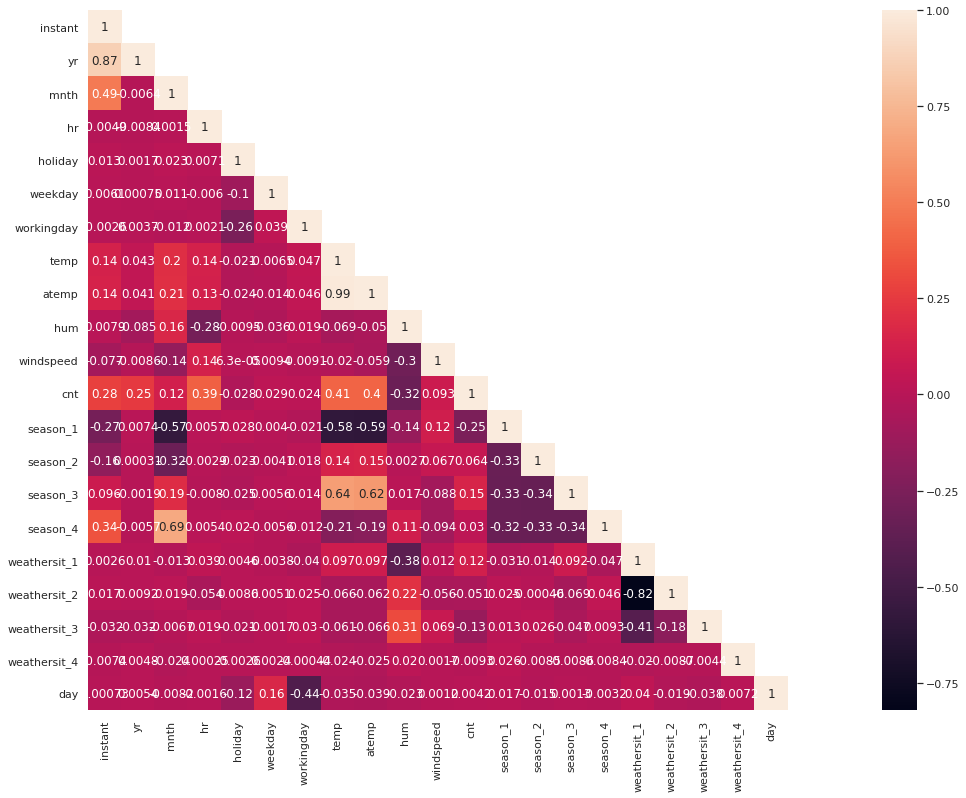

In [ ]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
df.drop(['weekday'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


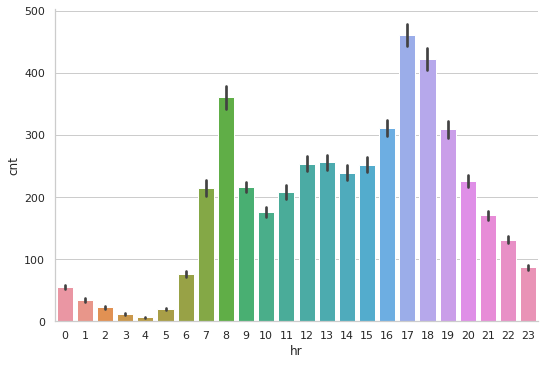

In [ ]:
sns.factorplot(x="hr",y="cnt",data=df,kind='bar',size=5,aspect=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


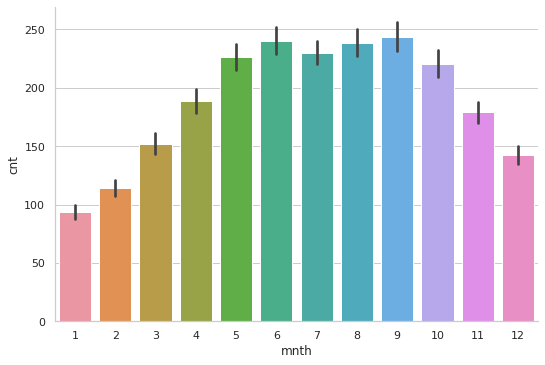

In [ ]:
sns.factorplot(x="mnth",y="cnt",data=df,kind='bar',size=5,aspect=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


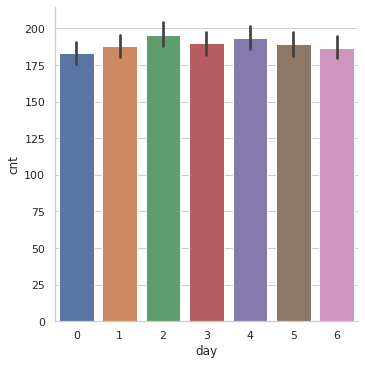

In [ ]:
sns.factorplot(x="day",y='cnt',kind='bar',data=df,size=5,aspect=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


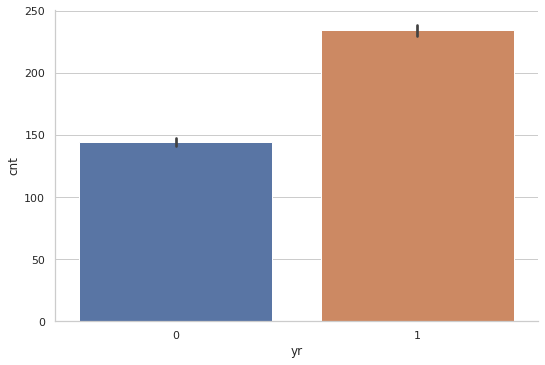

In [ ]:
sns.factorplot(x="yr",y="cnt",data=df,kind='bar',size=5,aspect=1.5)

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

{uint8: ['season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'], int64: ['instant', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'cnt', 'day'], float64: ['temp', 'atemp', 'hum', 'windspeed']}

# Model and hyper parameter tuning

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('cnt',axis=1),df['cnt'],test_size=0.25,random_state=42)

In [ ]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.3803231987866161,
  1.0965702648011597,
  0.3931650849134533,
  1.446606508809779,
  1.1893324831043777]}

In [ ]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.380323
1,AdaBoostRegressor,1.096570
2,BaggingRegressor,0.393165
3,SVR,1.446607
4,KNeighborsRegressor,1.189332


In [ ]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.3780519663884474


In [ ]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

# Test data

In [ ]:
test_df["weathersit_4"]= 0
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.dteday)]
test_df.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day
0,16267,15-11-2012,1,11,12,0,4,1,0.36,0.3636,0.62,0.1045,0,0,0,1,0,1,0,0,3
1,11800,11-05-2012,1,5,20,0,5,1,0.62,0.6061,0.25,0.1343,0,1,0,0,1,0,0,0,0
2,284,13-01-2011,0,1,6,0,4,1,0.12,0.1515,0.54,0.1343,1,0,0,0,1,0,0,0,3
3,8876,10-01-2012,1,1,16,0,2,1,0.42,0.4242,0.38,0.3582,1,0,0,0,1,0,0,0,0
4,8506,26-12-2011,0,12,2,1,1,0,0.34,0.3182,0.46,0.2239,1,0,0,0,1,0,0,0,0


In [ ]:
df.head()

,instant,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day
0,10136,1,3,9,0,0,0.38,0.3939,0.87,0.0896,94,1,0,0,0,0,0,1,0,5
1,6987,0,10,17,0,0,0.50,0.4848,0.63,0.1343,340,0,0,0,1,1,0,0,0,6
2,14303,1,8,3,0,1,0.64,0.6061,0.73,0.0000,8,0,0,1,0,1,0,0,0,4
3,2295,0,4,11,0,0,0.40,0.4091,0.87,0.1343,202,0,1,0,0,0,1,0,0,1
4,7869,0,11,12,0,1,0.42,0.4242,0.82,0.4179,18,0,0,0,1,0,0,1,0,1


In [ ]:
pred=clf_rf.predict(test_df.drop(['dteday','weekday'],axis=1))

In [ ]:
d={'prediction':pred}
ans=pd.DataFrame(d)

In [ ]:
ans.head()


,prediction
0,228.668
1,377.364
2,28.392
3,265.522
4,14.696


In [ ]:
ans.to_csv('/content/drive/My Drive/Colab Notebooks/Bike_Share_Regression_prob/prediction.csv',index=False)

Final RMLSE= 0.125230